In [257]:
import json
import glob 


import pandas
import seaborn

import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import statsmodels.multivariate
import statsmodels.multivariate.pca
import statsmodels.multivariate.factor


In [258]:
pandas.set_option('display.float_format', lambda x: f'{x:,.6f}')

In [324]:
MODEL: str = "llama3.3-70b"

In [325]:
raw: pandas.DataFrame = pandas.concat(
    [
        pandas.json_normalize(json.load(open(file))).assign(participant=n)
        for n, file in enumerate(glob.glob(f"data/base/{MODEL}/*.json", recursive=True))
    ],
)

In [326]:
pivoted: pandas.DataFrame = (
    raw
    .pipe(lambda _df: _df.assign(response=pandas.to_numeric(_df["response"], errors='coerce')))
    .pivot_table(
        values="response",
        index="participant",
        columns="dimension",
        aggfunc="mean"
    )
)
pivoted

dimension,authority,care,equality,loyalty,proportionality,purity
participant,,,,,,
0,4.000000,5.000000,3.666667,4.333333,4.500000,3.000000
1,4.000000,5.000000,3.666667,4.333333,4.500000,3.166667
2,4.000000,5.000000,3.666667,4.333333,4.666667,3.000000
3,4.000000,5.000000,3.666667,4.333333,4.500000,3.166667
4,4.000000,5.000000,4.000000,4.333333,4.500000,3.000000
...,...,...,...,...,...,...
245,4.000000,5.000000,3.666667,4.333333,4.500000,3.166667
246,4.000000,5.000000,3.666667,4.333333,4.500000,3.166667
247,4.000000,5.000000,3.666667,4.333333,4.666667,3.000000


In [302]:
pivoted.describe()

dimension,authority,care,equality,loyalty,proportionality,purity
count,249.000000,250.000000,248.000000,250.000000,250.000000,250.000000
mean,3.931392,4.364333,3.402688,3.933067,4.145333,3.612600
std,0.390173,0.257594,0.479092,0.408262,0.294836,0.507298
min,2.000000,3.500000,2.000000,2.666667,2.500000,2.000000
25%,3.750000,4.200000,3.000000,3.666667,4.000000,3.250000
50%,4.000000,4.400000,3.400000,4.000000,4.166667,3.600000
75%,4.200000,4.500000,3.666667,4.200000,4.333333,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [303]:
statsmodels.stats.descriptivestats.describe(pivoted)

dimension,authority,care,equality,loyalty,proportionality,purity
nobs,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
missing,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
mean,3.931392,4.364333,3.402688,3.933067,4.145333,3.612600
std_err,0.024726,0.016292,0.030422,0.025821,0.018647,0.032084
upper_ci,3.979855,4.396264,3.462315,3.983674,4.181881,3.675484
lower_ci,3.882930,4.332402,3.343061,3.882459,4.108786,3.549716
std,0.390173,0.257594,0.479092,0.408262,0.294836,0.507298
iqr,0.450000,0.300000,0.666667,0.533333,0.333333,0.750000
iqr_normal,0.333585,0.222390,0.494201,0.395361,0.247100,0.555976
mad,0.285920,0.197379,0.367920,0.308593,0.219387,0.401501


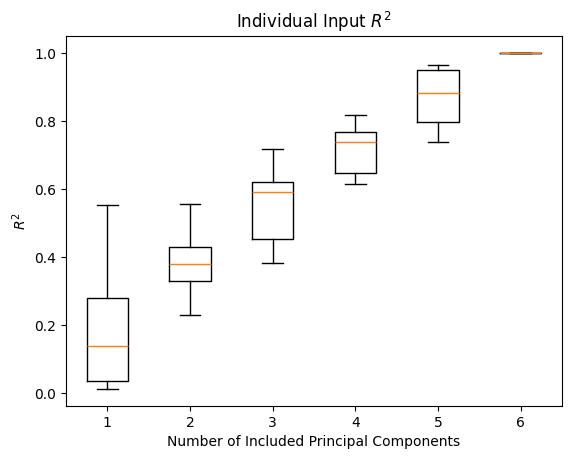

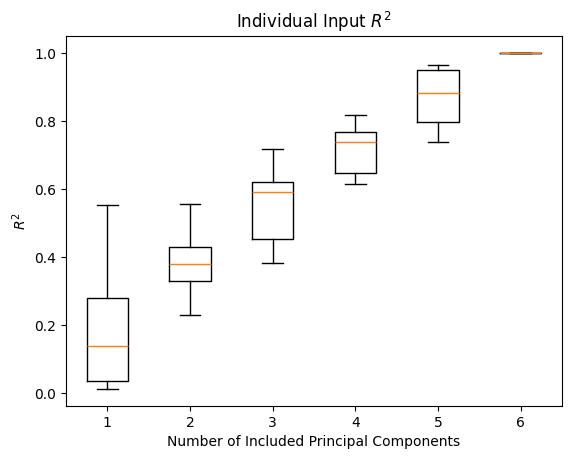

In [314]:
statsmodels.multivariate.pca.PCA(pivoted, missing="drop-row").plot_rsquare(ncomp=36)

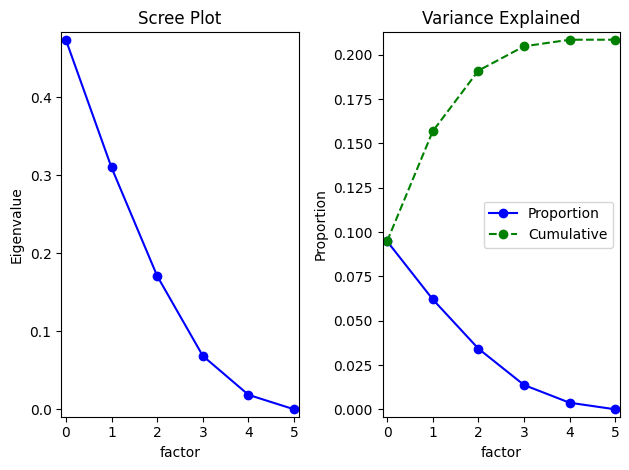

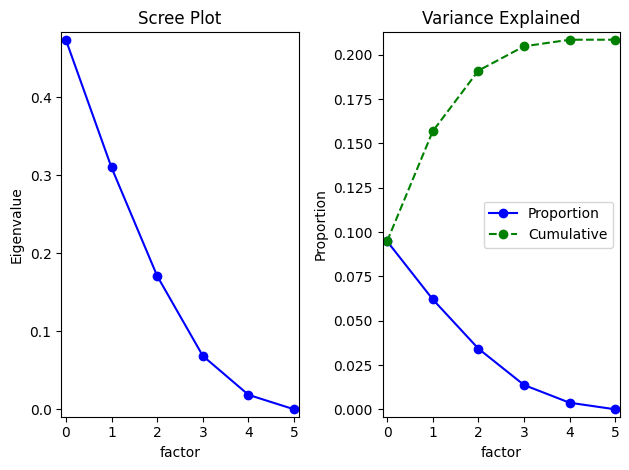

In [305]:
statsmodels.multivariate.factor.Factor(pivoted, n_factor=6).fit().plot_scree()

In [327]:
print(
    pivoted
    .round(1)
    .to_csv(index=False, na_rep="NA")
)

authority,care,equality,loyalty,proportionality,purity
4.0,5.0,3.7,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.5,3.2
4.0,5.0,3.7,4.3,4.7,3.0
4.0,5.0,3.7,4.3,4.5,3.2
4.0,5.0,4.0,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.7,3.0
4.0,5.0,4.0,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,4.0,4.3,4.7,3.0
4.0,5.0,3.3,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.5,3.2
4.0,5.0,3.7,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.7,3.0
4.0,5.0,3.7,4.3,4.5,3.2
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,3.7,4.3,4.7,3.0
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,4.0,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.7,3.0
4.0,5.0,3.7,4.3,4.7,3.0
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.7,3.2
4.0,5.0,3.7,4.5,4.3,3.0
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,3.7,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.5,3.0
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,3.7,4.3,4.3,3.2
4.0,5.0,3.7,4.3,4.3,3.0
4.0,5.0,3.7,4.3,4.2,3.2
4.0,5.0,3.7,4.3,4.7,3.2
4.0,5.0,3

<Axes: xlabel='variable', ylabel='value'>

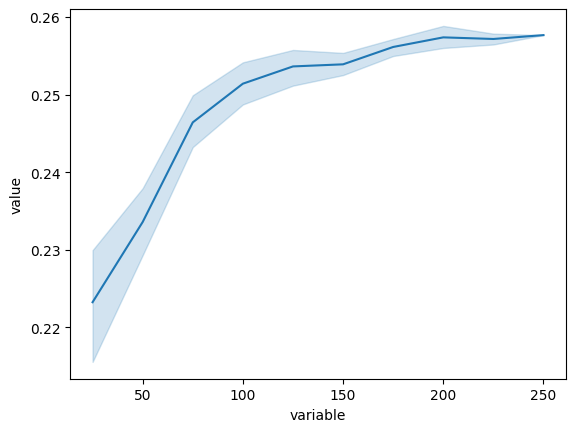

In [272]:
seaborn.lineplot(
    (
        pandas.DataFrame({
            n: [
                (
                    raw
                    .groupby("id")
                    .sample(n)
                    .pivot_table(
                        values="response",
                        columns="id",
                        aggfunc="std"
                    )
                    .T
                    .mean()
                ).values[0]
            for _ in range(25)
            ]
            for n in range(25, 251, 25)
        })
        .melt()
    ),
    x="variable",
    y="value"
)